# **Importaciones**

In [1]:
import numpy as np
import time, pickle
import pandas as pd
import matplotlib.pyplot as plt


from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# **Leer Data**

In [2]:
df = pd.read_csv('../data/Innova_2022.csv', encoding='utf-8', index_col=0)
df = df.T
df.head()

,Global Innovation Index,Innovation Input Sub-index,Innovation Output Sub-index,Institutions,Political environment,Political and operational stability,Government effectiveness,Regulatory environment,Regulatory quality,Rule of law,...,"Cultural and creative services exports, % total trade",National feature films/mn pop. 15ñ69,Entertainment and media market/th pop. 15ñ69,"Printing and other media, % manufacturing","Creative goods exports, % total trade",Online creativity,Generic top-level domains (TLDs)/th pop. 15ñ69,Country-code TLDs/th pop. 15ñ69,GitHub commits/mn pop. 15ñ69,Mobile app creation/bn PPP$ GDP
Albania,24.4,35.3,13.6,51.4,57.9,69.1,46.8,59.2,50.9,36.8,...,36.1,8.3,0.0,100.0,0.5,3.9,6.7,3.5,4.9,0.5
Algeria,16.7,26.7,6.7,47.2,47.4,56.4,38.4,50.4,12.7,25.8,...,0.3,0.9,0.8,4.0,0.1,0.7,0.5,0.1,2.2,0.1
Angola,13.9,21.1,6.8,41.9,43.0,61.8,24.3,51.1,22.3,21.1,...,0.0,0.0,0.0,60.6,0.1,0.1,0.0,0.1,0.2,0.0
Argentina,28.6,35.6,21.6,47.6,54.3,63.6,45.0,44.1,30.8,33.9,...,30.0,32.5,4.5,0.0,1.1,5.9,3.1,6.3,7.4,6.8
Armenia,26.6,34.3,18.9,59.7,54.4,61.8,47.0,68.8,51.2,43.9,...,10.3,0.0,0.0,39.8,9.0,6.6,3.1,5.1,8.0,10.1


In [3]:
keys = df.keys()

keys_x = []
keys_data = []

for i in keys:
  if i != ' Global Innovation Index' or \
     i != ' Innovation Input Sub-index' or \
     i != ' Innovation Output Sub-index':
    keys_x.append(i)
  keys_data.append(i)

X = df[keys_x].values
Y = df[' Global Innovation Index'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=(2/10), random_state=0)

initial_models = { 'RF': [] }
model_results = { 'RF': [] }

np.random.seed(42)  # Para la toma de decisión entre varios puntos

# **Entrenamiento de datos. Random forest (RF)**

El modelo de Random Forest se trata de un método avanzado, el cual se basa en la aleatoriedad para la creación de una variedad de modelos.

## **RF: Evaluación con hiperparámetros por omisión**

Una vez realizado el preproceso, realizaremos la implementación y evaluación del modelo siguiendo como se indica, la omisión de hiperparámetros

In [4]:
# Se crea la clase de Random Forest
t_inicio = time.time() # Se guarda el tiempo inicial
RF_og = RandomForestRegressor()
RF_og.fit(X_train, Y_train)        # Se entrena el modelo
accuracy_train_og = RF_og.score(X_test, Y_test)  # Se obtiene el resultado de aciertos
t_fin = time.time() # Se guarda el tiempo final
print('El modelo Random Forest con hiperparámetros por omisión ha obtenido una media de resultado de {:.4f}'.format(accuracy_train_og))
# Se miran sus errores
prediction = RF_og.predict(X_test)
error_rmse_og = sqrt(mean_squared_error(Y_test, prediction))
error_mae_og = mean_absolute_error(Y_test, prediction)
print('Como errores:\n\tRMSE\t= {}\n\tMAE\t= {}'.format(error_rmse_og, error_mae_og))
t_og = t_fin - t_inicio
print('El tiempo de ejecucion ha sido de {}'.format(t_og))
initial_models['RF'] = [accuracy_train_og, error_rmse_og, error_mae_og, t_og]

El modelo Random Forest con hiperparámetros por omisión ha obtenido una media de resultado de 0.9872
Como errores:
	RMSE	= 1.0587200518305753
	MAE	= 0.7499999999999998
El tiempo de ejecucion ha sido de 3.0134875774383545


Se observa que se obtiene un coeficiente de determinación del 98,72%, además se obtiene para el parametro RMSE 1,058 de error, que representa la raíz cuadrada del error cuadrático medio, es decir, la diferencia de los valores reales y la predicción al cuadrado. Por otro lado, se obtuvo para el MAE 0,7499 de error, el cual se trata de la media de la diferencia entre la realidad y la pronosticación en valor absoluto. Los errores obtenidos son bajos, indicando ya de primeras un buen resultado para el modelo creado por hiperparámetros por omisión.

## **RF: Escalado**

### *MinMax*

Mediante esta función de escalada trasnformaremos la proporción de los datos de entrenamiento para que tomen valores entre el 0 y el 1, obteniendo un peso mayor para la salida.

In [5]:
# Se escala con MinMax de un rango entre 0 y 1
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

# Se crea la clase de Random Forest
t_inicio = time.time() # Se guarda el tiempo inicial
RF_minmax = RandomForestRegressor()
RF_minmax.fit(X_train_minmax, Y_train) # Se entrena el modelo
accuracy_train_minmax = RF_minmax.score(X_test_minmax, Y_test)  # Se obtiene el resultado de aciertos
t_fin = time.time() # Se guarda el tiempo final
print('El modelo Random Forest con escaldado MinMax ha obtenido una media de resultado de {:.4f}'.format(accuracy_train_minmax))
# Se miran sus errores
prediction = RF_minmax.predict(X_test_minmax)
error_rmse_minmax = sqrt(mean_squared_error(Y_test, prediction))
error_mae_minmax = mean_absolute_error(Y_test, prediction)
print('Como errores:\n\tRMSE\t= {}\n\tMAE\t= {}'.format(error_rmse_minmax, error_mae_minmax))
t_minmax = t_fin - t_inicio
print('El tiempo de ejecucion ha sido de {}'.format(t_minmax))

El modelo Random Forest con escaldado MinMax ha obtenido una media de resultado de 0.9890
Como errores:
	RMSE	= 0.9810811874133001
	MAE	= 0.7111111111111094
El tiempo de ejecucion ha sido de 2.669781446456909


Como se puede observar, la media de resultado es parecida, siendo del 98,75%, incluso en los errores de RMSE y MAE.

### *Estandarización*

En este caso, se realizará un escalado de los datos de forma estándar. Esta es un método de escalda que consiste en la resta de la media de la variable y su posterior división de la desviación típica.

In [6]:
# Se escala con estandarización
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)

# Se crea la clase de Random Forest
t_inicio = time.time() # Se guarda el tiempo inicial
RF_standard = RandomForestRegressor()
RF_standard.fit(X_train_standard, Y_train) # Se entrena el modelo
accuracy_train_standard = RF_standard.score(X_test_standard, Y_test)  # Se obtiene el resultado de aciertos
t_fin = time.time() # Se guarda el tiempo final
print('El modelo Random Forest con escaldado estándar ha obtenido una media de resultado de {:.4f}'.format(accuracy_train_standard))
# Se miran sus errores
prediction = RF_standard.predict(X_test_standard)
error_rmse_standard = sqrt(mean_squared_error(Y_test, prediction))
error_mae_standard = mean_absolute_error(Y_test, prediction)
print('Como errores:\n\tRMSE\t= {}\n\tMAE\t= {}'.format(error_rmse_standard, error_mae_standard))
t_standard = t_fin - t_inicio
print('El tiempo de ejecucion ha sido de {}'.format(t_standard))

El modelo Random Forest con escaldado estándar ha obtenido una media de resultado de 0.9865
Como errores:
	RMSE	= 1.089284440627234
	MAE	= 0.7364444444444408
El tiempo de ejecucion ha sido de 2.5479283332824707


Al igual que con el anterior escalado, la media de resultado es parecida, siendo del 98,75% y los errores de RMSE y MAE también son parecidos.

### *Robusto*

Por último, se realizará un escalado de datos de forma robusta. La principal diferencia con el escalado anterior, se encuentra en la división, basándose, en este caso, en el rango intercuartilico, IQR.

In [7]:
# Se escala con escalado robusto
scaler_robust = RobustScaler()
X_train_robust = scaler_robust.fit_transform(X_train)
X_test_robust = scaler_robust.transform(X_test)

# Se crea la clase de Random Forest
t_inicio = time.time() # Se guarda el tiempo inicial
RF_robust = RandomForestRegressor()
RF_robust.fit(X_train_robust, Y_train) # Se entrena el modelo
accuracy_train_robust = RF_robust.score(X_test_robust, Y_test)  # Se obtiene el resultado de aciertos
t_fin = time.time() # Se guarda el tiempo final
print('El modelo Random Forest con escaldado robusto ha obtenido una media de resultado de {:.4f}'.format(accuracy_train_robust))
# Se miran sus errores
prediction = RF_robust.predict(X_test_robust)
error_rmse_robust = sqrt(mean_squared_error(Y_test, prediction))
error_mae_robust = mean_absolute_error(Y_test, prediction)
print('Como errores:\n\tRMSE\t= {}\n\tMAE\t= {}'.format(error_rmse_robust, error_mae_robust))
t_robust = t_fin - t_inicio
print('El tiempo de ejecucion ha sido de {}'.format(t_robust))

El modelo Random Forest con escaldado robusto ha obtenido una media de resultado de 0.9855
Como errores:
	RMSE	= 1.1276453014693575
	MAE	= 0.7821481481481466
El tiempo de ejecucion ha sido de 2.795128107070923


Comparado con los escalados anteriores, la media de resultado es parecida, siendo del 98,70% ligeramente peor, al igual que los errores de RMSE y MAE.

### **Análisis de los escalados**

Realizando un análisis de los escalados, se llega a la conclusión que el escalado de MinMax supera ligeramente al modelo original sin escalar los datos, por eso optará por el escalado MinMax. Cabe mencionar, en lo relativo al tiempo se obtiene mejores resultados cuando se realiza el escalado seleccionado de MinMax, siendo el más eficiente.

In [8]:
print('El modelo Random Forest con hiperparámetros por omisión ha obtenido una media de resultado de {:.4f}'.format(accuracy_train_og))
print('Como errores:\n\tRMSE\t= {}\n\tMAE\t= {}'.format(error_rmse_og, error_mae_og))
print('El tiempo de ejecucion  con hiperparámetros por omisión ha sido de {}'.format(t_og))
print('')
print('El modelo Random Forest con escalado MinMax ha obtenido una media de resultado de {:.4f}'.format(accuracy_train_minmax))
print('Como errores:\n\tRMSE\t= {}\n\tMAE\t= {}'.format(error_rmse_minmax, error_mae_minmax))
print('El tiempo de ejecucion  con escalado MinMax ha sido de {}'.format(t_minmax))
print('')
print('El modelo Random Forest con escalado estándar ha obtenido una media de resultado de {:.4f}'.format(accuracy_train_standard))
print('Como errores:\n\tRMSE\t= {}\n\tMAE\t= {}'.format(error_rmse_standard, error_mae_standard))
print('El tiempo de ejecucion  con escalado estándar ha sido de {}'.format(t_standard))
print('')
print('El modelo Random Forest con escalado robusto ha obtenido una media de resultado de {:.4f}'.format(accuracy_train_robust))
print('Como errores:\n\tRMSE\t= {}\n\tMAE\t= {}'.format(error_rmse_robust, error_mae_robust))
print('El tiempo de ejecucion  con escalado robusto ha sido de {}'.format(t_robust))

El modelo Random Forest con hiperparámetros por omisión ha obtenido una media de resultado de 0.9872
Como errores:
	RMSE	= 1.0587200518305753
	MAE	= 0.7499999999999998
El tiempo de ejecucion  con hiperparámetros por omisión ha sido de 3.0134875774383545

El modelo Random Forest con escalado MinMax ha obtenido una media de resultado de 0.9890
Como errores:
	RMSE	= 0.9810811874133001
	MAE	= 0.7111111111111094
El tiempo de ejecucion  con escalado MinMax ha sido de 2.669781446456909

El modelo Random Forest con escalado estándar ha obtenido una media de resultado de 0.9865
Como errores:
	RMSE	= 1.089284440627234
	MAE	= 0.7364444444444408
El tiempo de ejecucion  con escalado estándar ha sido de 2.5479283332824707

El modelo Random Forest con escalado robusto ha obtenido una media de resultado de 0.9855
Como errores:
	RMSE	= 1.1276453014693575
	MAE	= 0.7821481481481466
El tiempo de ejecucion  con escalado robusto ha sido de 2.795128107070923


In [9]:
X_train, X_test = X_train_minmax, X_test_minmax

## **RF: Ajustes de hiperparámetros**

Como se indica, a continuación se realizará la evaluación del modelo mediante el ajuste de hiperparámetros, de esta forma se modificarán la escala de los parámetros, los criterios o la profundidad entre otros.

### *Número de estimadores*

Se corresponde con la cantidad de árboles que se generan

In [10]:
posible_trees = range(0, 250, 5)
errors_rmse_ntree = []
errors_mae_ntree = []
scores_ntree = []
times_ntree = []

for n_tree in posible_trees:
  if (n_tree == 0):
    n_tree = 1
  # Se crea la clase de Random Forest
  t_inicio = time.time() # Se guarda el tiempo inicial
  RF = RandomForestRegressor(n_estimators=n_tree)
  RF.fit(X_train, Y_train) # Se entrena el modelo
  accuracy_train_ntree = RF.score(X_test, Y_test)  # Se obtiene el resultado de aciertos
  t_fin = time.time() # Se guarda el tiempo final
  # Se miran sus errores
  prediction = RF.predict(X_test)
  error_rmse_ntree = sqrt(mean_squared_error(Y_test, prediction))
  error_mae_ntree = mean_absolute_error(Y_test, prediction)
  t_ntree = t_fin - t_inicio
  errors_rmse_ntree.append(error_rmse_ntree)
  errors_mae_ntree.append(error_mae_ntree)
  times_ntree.append(t_ntree)
  scores_ntree.append(accuracy_train_ntree)

In [11]:
index = scores_ntree.index(max(scores_ntree))
print('Mayor score (n_trees = {} ; index = {}):\n\tScore\t= {}\n\tRMSE\t= {}\n\tMAE\t= {}\n\tTime\t= {}'.format(posible_trees[index], index, scores_ntree[index], errors_rmse_ntree[index], errors_mae_ntree[index], times_ntree[index]))
index = errors_rmse_ntree.index(min(errors_rmse_ntree))
print('Menor rmse (n_trees = {} ; index = {}):\n\tScore\t= {}\n\tRMSE\t= {}\n\tMAE\t= {}\n\tTime\t= {}'.format(posible_trees[index], index, scores_ntree[index], errors_rmse_ntree[index], errors_mae_ntree[index], times_ntree[index]))
index = errors_mae_ntree.index(min(errors_mae_ntree))
print('Menor mae (n_trees = {} ; index = {}):\n\tScore\t= {}\n\tRMSE\t= {}\n\tMAE\t= {}\n\tTime\t= {}'.format(posible_trees[index], index, scores_ntree[index], errors_rmse_ntree[index], errors_mae_ntree[index], times_ntree[index]))
index = times_ntree.index(min(times_ntree))
print('Menor tiempo (n_trees = {} ; index = {}):\n\tScore\t= {}\n\tRMSE\t= {}\n\tMAE\t= {}\n\tTime\t= {}'.format(posible_trees[index], index, scores_ntree[index], errors_rmse_ntree[index], errors_mae_ntree[index], times_ntree[index]))

Mayor score (n_trees = 215 ; index = 43):
	Score	= 0.9909757918201283
	RMSE	= 0.8901642119178099
	MAE	= 0.6196899224806275
	Time	= 4.044843435287476
Menor rmse (n_trees = 215 ; index = 43):
	Score	= 0.9909757918201283
	RMSE	= 0.8901642119178099
	MAE	= 0.6196899224806275
	Time	= 4.044843435287476
Menor mae (n_trees = 215 ; index = 43):
	Score	= 0.9909757918201283
	RMSE	= 0.8901642119178099
	MAE	= 0.6196899224806275
	Time	= 4.044843435287476
Menor tiempo (n_trees = 0 ; index = 0):
	Score	= 0.9708368483212417
	RMSE	= 1.6002314647390055
	MAE	= 1.3111111111111118
	Time	= 0.03299880027770996


Para mostrarlo de forma visual representaremos en una gráfica el comportamiento de los errores RMSE y MAE, mostrando sus puntos mínimos.

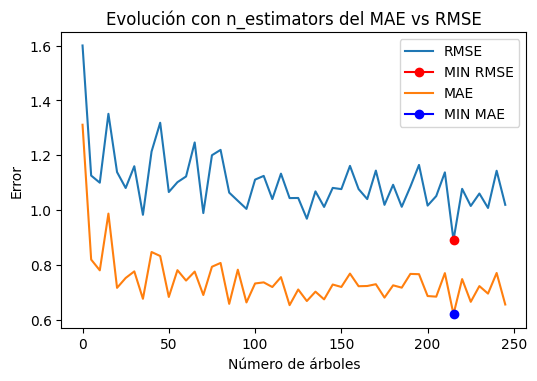

In [12]:
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(posible_trees, errors_rmse_ntree, label='RMSE')
ax.plot(posible_trees[errors_rmse_ntree.index(min(errors_rmse_ntree))], min(errors_rmse_ntree),
        marker='o', color = 'red', label='MIN RMSE')
ax.plot(posible_trees, errors_mae_ntree, label='MAE')
ax.plot(posible_trees[errors_mae_ntree.index(min(errors_mae_ntree))], min(errors_mae_ntree),
        marker='o', color = 'blue', label='MIN MAE')
ax.set_xlabel('Número de árboles')
ax.set_ylabel('Error')
ax.set_title('Evolución con n_estimators del MAE vs RMSE')
plt.legend()

plt.savefig('../images/RF/evolucion_error_arboles.png', dpi=300)
plt.show()

### *Número de atributos*

Se ve desde 1 a 76 posibles divisiones.

In [13]:
posible_features = range(1, X_train.shape[1] + 1)
errors_rmse_nfeat = []
errors_mae_nfeat = []
scores_nfeat = []
times_nfeat = []

for n_feature in posible_features:
  # Se crea la clase de Random Forest
  t_inicio = time.time() # Se guarda el tiempo inicial
  RF = RandomForestRegressor(max_features=n_feature)
  RF.fit(X_train, Y_train) # Se entrena el modelo
  accuracy_train_nfeat = RF.score(X_test, Y_test)  # Se obtiene el resultado de aciertos
  t_fin = time.time() # Se guarda el tiempo final
  # Se miran sus errores
  prediction = RF.predict(X_test)
  error_rmse_nfeat = sqrt(mean_squared_error(Y_test, prediction))
  error_mae_nfeat = mean_absolute_error(Y_test, prediction)
  t_nfeat = t_fin - t_inicio
  errors_rmse_nfeat.append(error_rmse_nfeat)
  errors_mae_nfeat.append(error_mae_nfeat)
  times_nfeat.append(t_nfeat)
  scores_nfeat.append(accuracy_train_nfeat)

In [14]:
index = scores_nfeat.index(max(scores_nfeat))
print('Mayor score (n_features = {} ; index = {}):\n\tScore\t= {}\n\tRMSE\t= {}\n\tMAE\t= {}\n\tTime\t= {}'.format(posible_features[index], index, scores_nfeat[index], errors_rmse_nfeat[index], errors_mae_nfeat[index], times_nfeat[index]))
index = errors_rmse_nfeat.index(min(errors_rmse_nfeat))
print('Menor rmse (n_features = {} ; index = {}):\n\tScore\t= {}\n\tRMSE\t= {}\n\tMAE\t= {}\n\tTime\t= {}'.format(posible_features[index], index, scores_nfeat[index], errors_rmse_nfeat[index], errors_mae_nfeat[index], times_nfeat[index]))
index = errors_mae_nfeat.index(min(errors_mae_nfeat))
print('Menor mae (n_features = {} ; index = {}):\n\tScore\t= {}\n\tRMSE\t= {}\n\tMAE\t= {}\n\tTime\t= {}'.format(posible_features[index], index, scores_nfeat[index], errors_rmse_nfeat[index], errors_mae_nfeat[index], times_nfeat[index]))
index = times_nfeat.index(min(times_nfeat))
print('Menor tiempo (n_features = {} ; index = {}):\n\tScore\t= {}\n\tRMSE\t= {}\n\tMAE\t= {}\n\tTime\t= {}'.format(posible_features[index], index, scores_nfeat[index], errors_rmse_nfeat[index], errors_mae_nfeat[index], times_nfeat[index]))

Mayor score (n_features = 89 ; index = 88):
	Score	= 0.9904572427028852
	RMSE	= 0.9153823123579407
	MAE	= 0.5894444444444429
	Time	= 1.4853122234344482
Menor rmse (n_features = 89 ; index = 88):
	Score	= 0.9904572427028852
	RMSE	= 0.9153823123579407
	MAE	= 0.5894444444444429
	Time	= 1.4853122234344482
Menor mae (n_features = 89 ; index = 88):
	Score	= 0.9904572427028852
	RMSE	= 0.9153823123579407
	MAE	= 0.5894444444444429
	Time	= 1.4853122234344482
Menor tiempo (n_features = 3 ; index = 2):
	Score	= 0.9572552193352456
	RMSE	= 1.937345702338734
	MAE	= 1.6975555555555533
	Time	= 0.18440890312194824


Para mostrarlo de forma visual, se representa en una gráfica el comportamiento de los errores RMSE y MAE, mostrando sus puntos mínimos.

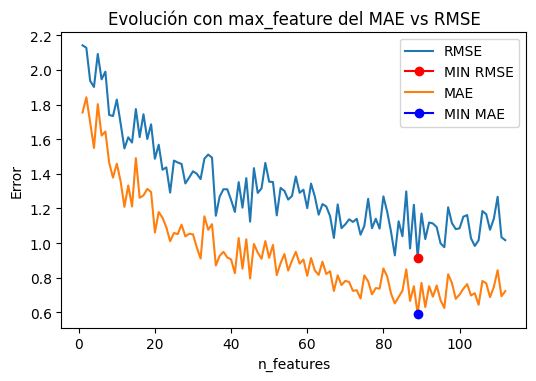

In [15]:
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(posible_features, errors_rmse_nfeat, label='RMSE')
ax.plot(posible_features[errors_rmse_nfeat.index(min(errors_rmse_nfeat))], min(errors_rmse_nfeat),
        marker='o', color = 'red', label='MIN RMSE')
ax.plot(posible_features, errors_mae_nfeat, label='MAE')
ax.plot(posible_features[errors_mae_nfeat.index(min(errors_mae_nfeat))], min(errors_mae_nfeat),
        marker='o', color = 'blue', label='MIN MAE')
ax.set_xlabel('n_features')
ax.set_ylabel('Error')
ax.set_title('Evolución con max_feature del MAE vs RMSE')
plt.legend()

plt.savefig('../images/RF/evolucion_error_max_feature.png', dpi=300)
plt.show()

## **RF: Cross-Validation**

Ahora con GridSearch, vemos con los mejores parámetros obtenidos.

In [16]:
# Se ve el mejor Random Forest con los mejores parámetros previos con GridSearchCV (cross-validation)
params = {'max_features': list(range(90, 105)),
          'n_estimators': list(range(195, 236, 5)),
          'max_depth': [None, 10, 20]
          }

# Se crea el modelo
t_inicio = time.time() # Se guarda el tiempo inicial
RF = RandomForestRegressor()

grid = GridSearchCV(RF, params, cv=4, scoring='neg_root_mean_squared_error')
grid.fit(X_train, Y_train)
t_fin = time.time() # Se guarda el tiempo final
print('Los mejores parámetros para el modelo random forest son:\n{}'.format(grid.best_params_))
t_grid = t_fin - t_inicio
print('El tiempo de ejecucion ha sido de {}'.format(t_grid))

Los mejores parámetros para el modelo random forest son:
{'max_depth': 20, 'max_features': 98, 'n_estimators': 215}
El tiempo de ejecucion ha sido de 4099.665187597275


In [17]:
dt_grid = pd.DataFrame(grid.cv_results_)
dt_grid.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,2.223656,0.050189,0.011250,0.000433,None,90,195,"{'max_depth': None, 'max_features': 90, 'n_est...",-1.203733,-2.497444,-0.702293,-1.083849,-1.371830,0.675736,10
1,2.307813,0.122085,0.012005,0.001603,None,90,200,"{'max_depth': None, 'max_features': 90, 'n_est...",-1.007997,-2.625113,-0.694365,-1.380230,-1.426926,0.733140,146
2,2.245123,0.029244,0.010483,0.000856,None,90,205,"{'max_depth': None, 'max_features': 90, 'n_est...",-1.118864,-2.663488,-0.793539,-1.231454,-1.451836,0.717791,268
3,2.315916,0.048396,0.012271,0.000445,None,90,210,"{'max_depth': None, 'max_features': 90, 'n_est...",-1.082988,-2.693386,-0.705665,-1.214090,-1.424032,0.756257,133
4,2.353071,0.031808,0.011236,0.000443,None,90,215,"{'max_depth': None, 'max_features': 90, 'n_est...",-1.071839,-2.671783,-0.684347,-1.152800,-1.395192,0.758007,40


# **RF: Conclusión**

Con el último modelo de cross-validation, se puede ver que haciendo validación cruzada reduce el error, manteniendo la media de resultado.

In [18]:
# Se coge el mejor modelo obtenido en el GridSearchCV
best_RF = grid.best_estimator_

accuracy_train_grid = best_RF.score(X_test, Y_test)  # Se obtiene el resultado de aciertos
print('El mejor modelo Random Forest sacado del GridSearch (CV=4) ha obtenido una media de resultado de {:.4f}'.format(accuracy_train_grid))
# Se miran sus errores
prediction = best_RF.predict(X_test)
error_rmse_grid = sqrt(mean_squared_error(Y_test, prediction))
error_mae_grid = mean_absolute_error(Y_test, prediction)
print('Como errores:\n\tRMSE\t= {}\n\tMAE\t= {}'.format(error_rmse_grid, error_mae_grid))

model_results['RF'] = [accuracy_train_grid, error_rmse_grid, error_mae_grid]

El mejor modelo Random Forest sacado del GridSearch (CV=4) ha obtenido una media de resultado de 0.9868
Como errores:
	RMSE	= 1.0761504921794234
	MAE	= 0.7397932816537512


In [19]:
print('El modelo de random forest con escalado MinMax ha obtenido una media de resultado de {:.4f}'.format(accuracy_train_minmax))
print('Como errores:\n\tRMSE\t= {}\n\tMAE\t= {}'.format(error_rmse_minmax, error_mae_minmax))

print('')

print('El modelo random forest final ha obtenido una media de resultado de {:.4f}'.format(model_results['RF'][0]))
print('Como errores:\n\tRMSE\t= {}\n\tMAE\t= {}'.format(model_results['RF'][1], model_results['RF'][2]))

El modelo de random forest con escalado MinMax ha obtenido una media de resultado de 0.9890
Como errores:
	RMSE	= 0.9810811874133001
	MAE	= 0.7111111111111094

El modelo random forest final ha obtenido una media de resultado de 0.9868
Como errores:
	RMSE	= 1.0761504921794234
	MAE	= 0.7397932816537512


In [20]:
with open('../data/models/RF_minmax.pkl', 'wb') as f:
    pickle.dump(RF_minmax, f)

with open('../data/models/best_RF.pkl', 'wb') as f:
    pickle.dump(best_RF, f)